In [25]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(seed=1)

In [26]:
# [0, 1]から20点をサンプリング
x = np.random.uniform(0, 1, 20)

# 予測する関数の定義。 f(x) = x * 2
def f(x):
    return x * 2

# ガウシアンノイズを加えて、観測値 t を生成する
# randn関数は正規分布に従う形でランダムな値を出力する関数
noise_variance = 0.2
noise = np.random.randn(x.shape[0]) * noise_variance 
t = f(x) + noise

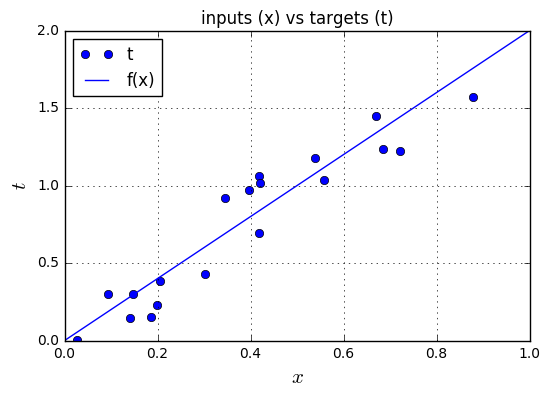

In [27]:
# 入力xと出力t
plt.plot(x, t, 'o', label='t')

# f(0)とf(1)を通る直線を最初の予測として直線を引く
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0, 2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

In [28]:
# ニューラルネットワークのモデル y = x * w
def nn(x, w):
    return x * w

# コスト関数
def cost(y, t):
    return ((t - y) ** 2).sum()

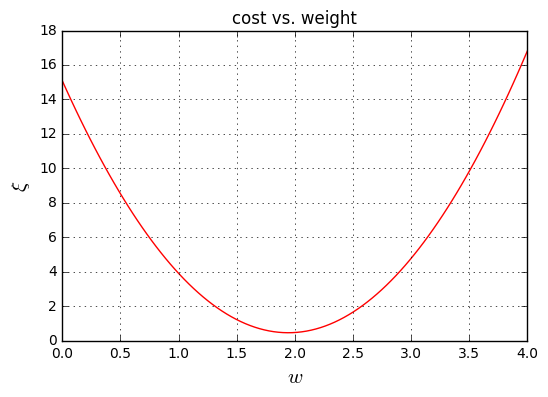

In [29]:
# 重み w とコストの関係
ws = np.linspace(0, 4, num=100)
cost_ws = np.vectorize(lambda w: cost(nn(x, w), t))(ws)

plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs. weight')
plt.grid()
plt.show()

In [30]:
# 勾配を定義
def gradient(w, x, t):
    return 2 * x * (nn(x, w) - t)

# Δwを定義
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# 初期の重み
w = 0.1

# 学習率
learning_rate = 0.1

# 最急降下法による更新
num_of_iterations = 4
w_cost = [(w, cost(nn(x, w), t))]
for i in range(num_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw
    w_cost.append((w, cost(nn(x, w), t)))
    
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))


w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


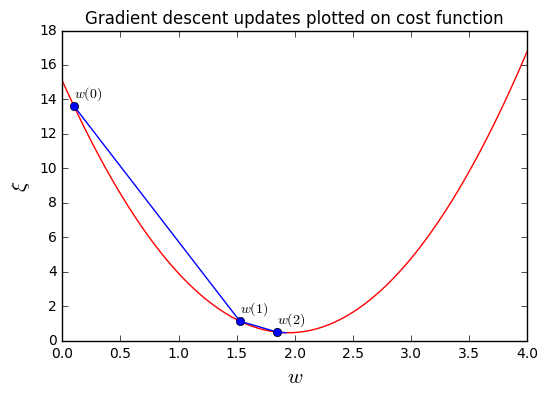

In [31]:
plt.plot(ws, cost_ws, 'r-')

for i in range(0, len(w_cost) - 2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i + 1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2], [c1, c2], 'b-')
    plt.text(w1, c1 + 0.5, '$w({})$'.format(i))
    
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.show()

In [32]:
# 最急降下法のイテレーションを10回まわす
w = 0
num_of_iterations = 10
for i in range(num_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw

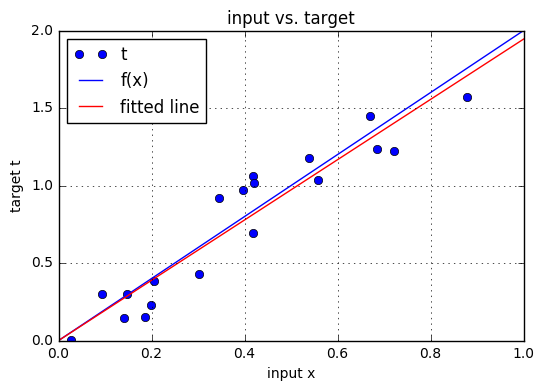

In [33]:
plt.plot(x, t, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')

plt.plot([0, 1], [0 * w, 1 * w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0, 2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()